# Load the dataset, PRSA_Data.csv, into memory.

In [ ]:
import pandas as pd
import glob
df = pd.read_csv('data.csv',sep = ',')

allFiles = glob.glob("/content/data/*.csv")
dataFrames = []
for i in allFiles:
    df = pd.read_csv(i, index_col=None, header=0)
    dataFrames.append(df)
data = pd.concat(dataFrames)

#drop the number
data.drop(["No"], axis=1, inplace=True)
data.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'pm2.5': 'PM2.5',
                       'DEWP': 'DewP',
                       'TEMP': 'Temp',
                       'PRES': 'Press',
                       'RAIN': 'Rain',
                       'wd': 'WinDir',
                       'WSPM': 'WinSpeed',
                       'station': 'Station'}, inplace = True)
data

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


# Clean the data and check missing values for this dataset.

In [ ]:
import numpy as np
# fill the null values in numerical columns with average specific to certain column


unique_Month = pd.unique(data.Month) #get all unique months in a list

temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["PM2.5", 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed']
for c in unique_Month:

    #this is the power of boolean indexing in pandas
    # creates boolean mask Month filter of true and false months
    Month_filtre = temp_data.Month == c
    # filter data by Month selecting only matching the month C
    fitered_data = temp_data[Month_filtre]

    # loop through columns starting with PM2.5
    for s in columns:
        #get PM2.5 from the filtered_data (aka the month) and round to 2 decimal places
        mean = np.round(np.mean(fitered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Month
            fitered_data[s] = fitered_data[s].fillna(mean)
            #print(f"Missing Value in {s} column fill with {mean} when Month:{c}")
        else: # find average for all data if no average in specific to Month.
        #in other words there is no data available for that month
            all_data_mean = np.round(np.mean(data[s]),2)
            fitered_data[s] = fitered_data[s].fillna(all_data_mean)
            #print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in PM2.5 to data temporary
    temp_data[Month_filtre] = fitered_data

data = temp_data.copy()


<ipython-input-2-60dd46916a03>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitered_data[s] = fitered_data[s].fillna(mean)


In [ ]:
data.dropna(subset=['WinDir'],inplace=True)

In [ ]:
data.dtypes

Year          int64
Month         int64
Day           int64
Hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
Temp        float64
Press       float64
DewP        float64
Rain        float64
WinDir       object
WinSpeed    float64
Station      object
dtype: object

In [ ]:
data.isnull().sum(axis = 0)

Year        0
Month       0
Day         0
Hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
Temp        0
Press       0
DewP        0
Rain        0
WinDir      0
WinSpeed    0
Station     0
dtype: int64

# Convert all categorical variables to numerical values.


In [ ]:
data['WinDir'] = data['WinDir'].astype('category')

In [ ]:
data['WinDir'] = data['WinDir'].cat.codes



In [ ]:
print(data['WinDir'].unique())

[ 7 14 13  0  1  4  2 10  5 12 11  8  9  6  3 15]


In [ ]:
catFeatures = ['Station']
#avoid multicollinearity issues in regression models because the information about the dropped category can be inferred from the absence of the other categories
factors = pd.get_dummies(data[catFeatures],drop_first=True)
data = data.drop(catFeatures,axis=1)
data = pd.concat([data,factors], axis = 1)
data.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,...,Station_Dingling,Station_Dongsi,Station_Guanyuan,Station_Gucheng,Station_Huairou,Station_Nongzhanguan,Station_Shunyi,Station_Tiantan,Station_Wanliu,Station_Wanshouxigong
0,2013,3,1,0,6.0,18.0,5.0,60.12,800.00,88.00,...,0,0,0,1,0,0,0,0,0,0
1,2013,3,1,1,6.0,15.0,5.0,60.12,800.00,88.00,...,0,0,0,1,0,0,0,0,0,0
2,2013,3,1,2,5.0,18.0,28.0,60.12,700.00,52.00,...,0,0,0,1,0,0,0,0,0,0
3,2013,3,1,3,6.0,20.0,6.0,60.12,1310.23,51.04,...,0,0,0,1,0,0,0,0,0,0
4,2013,3,1,4,5.0,17.0,5.0,60.12,600.00,73.00,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
'''
data['Date'] = pd.to_datetime(data[['Year','Month','Day']])
data.tail()
'''

"\ndata['Date'] = pd.to_datetime(data[['Year','Month','Day']])\ndata.tail()\n"

In [ ]:
data.dtypes

Year                       int64
Month                      int64
Day                        int64
Hour                       int64
PM2.5                    float64
PM10                     float64
SO2                      float64
NO2                      float64
CO                       float64
O3                       float64
Temp                     float64
Press                    float64
DewP                     float64
Rain                     float64
WinDir                      int8
WinSpeed                 float64
Station_Changping          uint8
Station_Dingling           uint8
Station_Dongsi             uint8
Station_Guanyuan           uint8
Station_Gucheng            uint8
Station_Huairou            uint8
Station_Nongzhanguan       uint8
Station_Shunyi             uint8
Station_Tiantan            uint8
Station_Wanliu             uint8
Station_Wanshouxigong      uint8
dtype: object

In [ ]:
np.round(data[columns].describe(),decimals=2)

,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinSpeed
count,418946.00,418946.00,418946.00,418946.00,418946.00,418946.00,418946.00,418946.00,418946.00,418946.00,418946.00
mean,79.68,104.55,15.83,50.57,1231.17,57.36,13.56,1010.73,2.49,0.06,1.74
std,79.97,91.07,21.48,34.64,1135.14,56.05,11.44,10.48,13.80,0.82,1.24
min,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-36.00,0.00,0.00
25%,21.00,36.00,3.00,24.00,500.00,12.00,3.10,1002.20,-8.90,0.00,0.90
50%,57.00,83.00,7.43,44.00,900.00,45.00,14.50,1010.40,3.10,0.00,1.40
75%,109.00,144.00,20.00,70.00,1500.00,82.00,23.30,1019.00,15.10,0.00,2.20
max,999.00,999.00,500.00,290.00,10000.00,1071.00,41.60,1042.80,29.10,72.50,13.20


In [ ]:
np.round(data[columns].corr(),decimals=2)

,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinSpeed
PM2.5,1.00,0.88,0.48,0.66,0.77,-0.15,-0.13,0.02,0.11,-0.01,-0.27
PM10,0.88,1.00,0.46,0.65,0.68,-0.11,-0.10,-0.02,0.07,-0.03,-0.18
SO2,0.48,0.46,1.00,0.49,0.53,-0.17,-0.33,0.23,-0.27,-0.04,-0.11
NO2,0.66,0.65,0.49,1.00,0.69,-0.47,-0.28,0.18,-0.04,-0.04,-0.39
CO,0.77,0.68,0.53,0.69,1.00,-0.31,-0.33,0.20,-0.07,-0.01,-0.29
O3,-0.15,-0.11,-0.17,-0.47,-0.31,1.00,0.60,-0.45,0.32,0.02,0.29
Temp,-0.13,-0.10,-0.33,-0.28,-0.33,0.60,1.00,-0.81,0.82,0.04,0.03
Press,0.02,-0.02,0.23,0.18,0.20,-0.45,-0.81,1.00,-0.75,-0.06,0.07
DewP,0.11,0.07,-0.27,-0.04,-0.07,0.32,0.82,-0.75,1.00,0.09,-0.30
Rain,-0.01,-0.03,-0.04,-0.04,-0.01,0.02,0.04,-0.06,0.09,1.00,0.02


In [ ]:
import seaborn as sns
import warnings
'''
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
sns.pairplot(data[columns],diag_kind='kde')
'''

"\nwarnings.filterwarnings('ignore')\nwarnings.simplefilter('ignore')\nsns.pairplot(data[columns],diag_kind='kde')\n"

# Split the data into 80% of training and 20% of the test dataset.

In [ ]:
X = data.drop('WinDir',axis = 1)
y = data['WinDir']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = .2, random_state = 2021)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (335156, 26)
y_train: (335156,)
X_test: (83790, 26)
y_test: (83790,)


# Preprocess the data using the normalization method to convert all features into the range of [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neuron network with two hidden layers of 20 and 10 neurons to forecast PM2.5 using all other features and TensorFlow. Does it overfit or underfit the data? Please justify your answer.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(units = len(data['WinDir'].unique()),activation = 'softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
%%time
tf.random.set_seed(1)
history = model.fit(x=X_train,y=y_train,batch_size=64,epochs=100,
                    validation_data=(X_test,y_test),verbose = 1)

Epoch 1/100
5237/5237 [==============================] - 18s 3ms/step - loss: 2.5601 - accuracy: 0.1615 - val_loss: 2.4652 - val_accuracy: 0.1801
Epoch 2/100
5237/5237 [==============================] - 11s 2ms/step - loss: 2.4450 - accuracy: 0.1925 - val_loss: 2.4206 - val_accuracy: 0.2014
Epoch 3/100
5237/5237 [==============================] - 11s 2ms/step - loss: 2.4177 - accuracy: 0.2002 - val_loss: 2.4052 - val_accuracy: 0.2034
Epoch 4/100
5237/5237 [==============================] - 11s 2ms/step - loss: 2.4025 - accuracy: 0.2044 - val_loss: 2.3997 - val_accuracy: 0.2038
Epoch 5/100
5237/5237 [==============================] - 11s 2ms/step - loss: 2.3907 - accuracy: 0.2079 - val_loss: 2.3796 - val_accuracy: 0.2111
Epoch 6/100
5237/5237 [==============================] - 12s 2ms/step - loss: 2.3812 - accuracy: 0.2110 - val_loss: 2.3696 - val_accuracy: 0.2140
Epoch 7/100
5237/5237 [==============================] - 11s 2ms/step - loss: 2.3742 - accuracy: 0.2129 - val_loss: 2.3664 -

In [ ]:
trainhist = pd.DataFrame(history.history)
trainhist['epoch'] = history.epoch
trainhist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,2.316763,0.224224,2.316017,0.225063,95
96,2.317160,0.224761,2.309394,0.224860,96
97,2.317010,0.224182,2.323194,0.223666,97
98,2.317005,0.224582,2.311125,0.225254,98
99,2.316832,0.224069,2.314517,0.223272,99


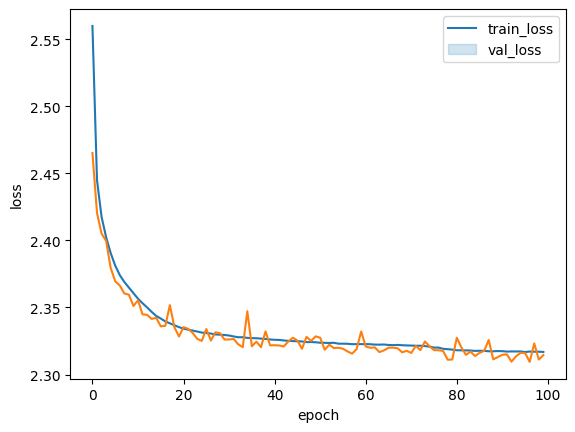

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(x='epoch',y='loss',data=trainhist)
sns.lineplot(x='epoch',y='val_loss',data=trainhist)
plt.legend(labels=['train_loss','val_loss'])

This above output shows a line graph of val_loss in the range 2.45 to 2.3 on the y axis and epoch in the range 0 to 100 on the x. Train_loss is in blue and we see a rapid decrease at 0 and then both lines are relatively flat slowly decreasing over 2.45 to 2.3.

# Tune the model using the following hyperparameters using keras-tuner:
- First hidden layer with units between 20 and 100 with a step size of 5
- Second hidden layer with units between 10 and 50 with a step size of 2
- The dropout rate for both hidden layer is between 0.2 and 0.8 with a step size of 0.1

Please recommend the optimal model and specify the hyperparameters.

In [ ]:
import sys
if('keras-tuner' not in sys.modules):
  !pip install -q -U keras-tuner
import kerastuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.7 MB/s eta 0:00:00


<ipython-input-21-69496f72a099>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

def model_builder(hp):
  model = keras.Sequential()

  #initializing units and dropout
  hp_units1 = hp.Int('units1', min_value = 20, max_value = 100, step = 5)
  hp_units2 = hp.Int('units2', min_value = 10, max_value = 50, step = 2)
  hp_dropout1 = hp.Float('rate', min_value = 0.2, max_value = 0.8, step = 0.1)
  hp_dropout2 = hp.Float('rate2', min_value = 0.2, max_value = 0.8, step = 0.1)
  # first hidden layer
  model.add(layers.Dense(units = hp_units1, activation = 'relu'))
  model.add(Dropout(rate = hp_dropout1))

  # second hidden layer
  model.add(layers.Dense(units = hp_units2, activation = 'relu'))
  model.add(Dropout(rate = hp_dropout2))


  # output layer has one and only one neuron
  model.add(layers.Dense(units = 16, activation = 'softmax'))

 # Tune the learning rate for the optimizer
 # Search the lerning rate from 0.01, 0.001, or 0.0001.
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = hp_learning_rate), loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
  return model

In [ ]:
tuner = kerastuner.Hyperband(model_builder, #Specify the model
                     objective = 'val_loss', #Specify the objective function
                     max_epochs = 100, #Specify the maximum epochs
                     directory = 'my_dir', #Specify the file path
                     project_name = 'tuningRegression')

In [ ]:
import IPython
#Clear all the training outputs
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test,y_test), callbacks = [ClearTrainingOutput()])

Trial 6 Complete [00h 00m 49s]
val_loss: 2.4802167415618896

Best val_loss So Far: 2.3925745487213135
Total elapsed time: 00h 05m 44s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
60                |75                |units1
18                |36                |units2
0.6               |0.4               |rate
0.3               |0.3               |rate2
0.0001            |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
 1992/10474 [====>.........................] - ETA: 14s - loss: 2.7654 - accuracy: 0.0867

KeyboardInterrupt: ignored

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
#Use f-strings to format the outputs
print(f"""
The optimal number of units in the input layer =  {best_hps.get('units1')}.
The optimal number of units in the input layer =  {best_hps.get('units2')}.
The optimal dropout rate in the input layer = {best_hps.get('rate')}
The optimal dropout rate in the input layer = {best_hps.get('rate2')}
The optimal learning rate for the optimizer of Adam = {best_hps.get('learning_rate')}.
""")


The optimal number of units in the input layer =  75.
The optimal number of units in the input layer =  36.
The optimal dropout rate in the input layer = 0.4
The optimal dropout rate in the input layer = 0.30000000000000004
The optimal learning rate for the optimizer of Adam = 0.001.



The optimal number of units in the input layer =  25.
The optimal dropout rate in the input layer = 0.5
The optimal learning rate for the optimizer of Adam = 0.0001.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test,y_test))

Epoch 1/100
10474/10474 [==============================] - 24s 2ms/step - loss: 2.5370 - accuracy: 0.1689 - val_loss: 2.4113 - val_accuracy: 0.2045
Epoch 2/100
10474/10474 [==============================] - 24s 2ms/step - loss: 2.4620 - accuracy: 0.1901 - val_loss: 2.3899 - val_accuracy: 0.2125
Epoch 3/100
10474/10474 [==============================] - 25s 2ms/step - loss: 2.4562 - accuracy: 0.1923 - val_loss: 2.3816 - val_accuracy: 0.2145
Epoch 4/100
10474/10474 [==============================] - 23s 2ms/step - loss: 2.4565 - accuracy: 0.1924 - val_loss: 2.3781 - val_accuracy: 0.2123
Epoch 5/100
10474/10474 [==============================] - 23s 2ms/step - loss: 2.4596 - accuracy: 0.1929 - val_loss: 2.3840 - val_accuracy: 0.2128
Epoch 6/100
10474/10474 [==============================] - 23s 2ms/step - loss: 2.4646 - accuracy: 0.1914 - val_loss: 2.3873 - val_accuracy: 0.2106
Epoch 7/100
10474/10474 [==============================] - 26s 2ms/step - loss: 2.4704 - accuracy: 0.1908 - val_

loss: 1689.5347 - mean_squared_error: 1689.5347 - val_loss: 816.8865 - val_mean_squared_error: 816.8865

In [ ]:
trainhist = pd.DataFrame(history.history)
trainhist['epoch'] = history.epoch
trainhist.tail()


,loss,accuracy,val_loss,val_accuracy,epoch
95,2.595446,0.156611,2.506898,0.176549,95
96,2.594692,0.156423,2.508944,0.175164,96
97,2.592572,0.158589,2.505328,0.174496,97
98,2.595465,0.157819,2.515572,0.164817,98
99,2.595623,0.156485,2.503407,0.171309,99


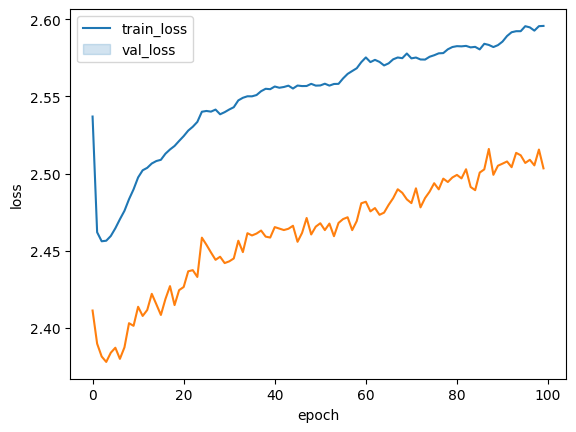

In [ ]:
sns.lineplot(x='epoch',y='loss',data=trainhist)
sns.lineplot(x='epoch',y='val_loss',data=trainhist)
plt.legend(labels=['train_loss','val_loss'])

In [ ]:
def model_create():
  model = keras.Sequential()
  model.add(layers.Dense(units = 90, activation = 'relu'))
  model.add(Dropout(rate = 0.3))

  model.add(layers.Dense(10, activation='relu'))
  model.add(Dropout(0.3))
  model.add(layers.Dense( units = 16, activation='softmax'))

  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model
# Create the model
model = model_create()

In [ ]:
# Specify the directory to save the weights
import os
cp_path = "training/cp.regr"
cp_dir = os.path.dirname(cp_path)

# Create a callback to save the model's weights
# We only save the best weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=cp_path, save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model and specif the defined callback using callbacks=[]
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test,y_test),
         callbacks=[cp_callback])

Epoch 1/100
10473/10474 [============================>.] - ETA: 0s - loss: 2.6077 - accuracy: 0.1419
Epoch 1: val_loss improved from inf to 2.51834, saving model to training/cp.regr
10474/10474 [==============================] - 29s 3ms/step - loss: 2.6077 - accuracy: 0.1419 - val_loss: 2.5183 - val_accuracy: 0.1681
Epoch 2/100
10459/10474 [============================>.] - ETA: 0s - loss: 2.6075 - accuracy: 0.1426
Epoch 2: val_loss did not improve from 2.51834
10474/10474 [==============================] - 25s 2ms/step - loss: 2.6076 - accuracy: 0.1426 - val_loss: 2.5381 - val_accuracy: 0.1582
Epoch 3/100
10453/10474 [============================>.] - ETA: 0s - loss: 2.6230 - accuracy: 0.1369
Epoch 3: val_loss did not improve from 2.51834
10474/10474 [==============================] - 23s 2ms/step - loss: 2.6230 - accuracy: 0.1369 - val_loss: 2.5566 - val_accuracy: 0.1501
Epoch 4/100
10447/10474 [============================>.] - ETA: 0s - loss: 2.6276 - accuracy: 0.1342
Epoch 4: val_

In [ ]:
#First, create the model
model = model_create()
#Second, load the weights
model.load_weights(cp_path)
#Note here, we don't train the model at all
#Third evaluate the model on the new dataset
loss = model.evaluate(X_test, y_test, verbose=2)

print("Reloaded model from file with loss: {:5.2f}".format(loss[1]))

2619/2619 - 3s - loss: 2.5183 - accuracy: 0.1681 - 3s/epoch - 1ms/step
Reloaded model from file with loss:  0.17


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
confusion_mat = confusion_matrix(y_test, predicted_classes)
print(confusion_mat)

2619/2619 [==============================] - 6s 2ms/step
[[   0  317  112  206 3549    0    0  856    0    8   99    0  767    0
     0    0]
 [   0  432   57  239 4760    0    1  833    0    9   40    0  604    0
     0    0]
 [   0  160  151  200 2390    0    0  801    0   15  189    0  875    0
     0    0]
 [   0   59   51  771 2875    1   12 2174    0    8   23    0  348    0
     2    0]
 [   0  359   50  584 5846    3    4 1208    0    8   25    0  599    0
     0    0]
 [   0  119   47  617 3365    0    3 1152    0    4   24    0  345    0
     0    0]
 [   0   16   39  436 1387    0   13 2814    0    6   11    0  305    0
     4    0]
 [   0   27   35  372 1732    4   18 3824    0    2   13    0  450    0
    12    0]
 [   0   31  134  148 1457    0    0  393    0   36  198    0 1440    0
     0    0]
 [   1   84  126  180 1795    0    0  518    0   25  198    0 1021    0
     0    0]
 [   0   29  150  184 1324    0    0  420    1   42  285    0 1090    0
     0    0]
 [   0  

In [ ]:
#print(classification_report(y_test,predictions))

# Build a neuron network with two hidden layers of 20 and 10 neurons to forecast PM2.5 using all other features and PyTorch. Does it overfit or underfit the data? Please justify your answer.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64))#.reshape(-1,1))

In [ ]:
input_size = X_train.shape[1]
output_size = len(data['WinDir'].unique())
#specify the number of neuron for the first layer
hidden_size = [20, 10]
print(input_size)
print(output_size)

#convert numpy to tensor from_numpy
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64))

26
16


In [ ]:
# define the child module class derivated from parent class of torch.nn.Module)
class LinearRegressionModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0])
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
        self.predict = torch.nn.Linear(hidden_size[1], output_size)
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        y_pred = self.predict(x)
        return y_pred

In [ ]:
model = LinearRegressionModel(input_size, hidden_size,  output_size)

In [ ]:
l = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
%%time
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs

num_epochs = 100

train_loss = [None]*num_epochs
validition_loss = [None]*num_epochs
for epoch in range(num_epochs):
    output = model(X_train)
    #calculate the loss
    loss= l(output, y_train)
    train_loss[epoch] = loss.item()
    #Set the gradients to be zero
    optimizer.zero_grad()
    #backward pass: calculate gradients
    loss.backward()
    #update the weights
    optimizer.step()

    #Stop tracking the gradient by calling detach since we don't use it anymore
    y_pred = model(X_test)#.detach().numpy()
    val_loss = l(y_pred,y_test)
    validition_loss[epoch] = val_loss.item()
    if epoch % 100 == 0:
        print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 2.8121 and val_loss = 2.8119
CPU times: user 16.3 s, sys: 890 ms, total: 17.2 s
Wall time: 17.4 s


In [ ]:
print(y_pred.shape)
print(y_test.shape)

In [ ]:
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': validition_loss, 'epoch':np.arange(num_epochs)})
trainhist.tail()

,train_loss,val_loss,epoch
95,2.800091,2.799754,95
96,2.799982,2.799644,96
97,2.799874,2.799534,97
98,2.799766,2.799425,98
99,2.799658,2.799316,99


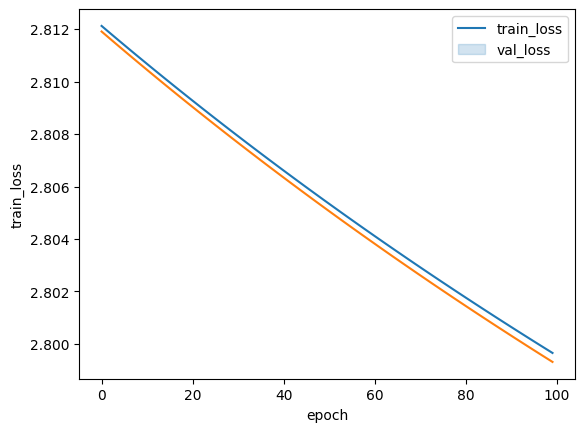

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
plt.legend(labels=['train_loss', 'val_loss'])

In [ ]:
%%time
# define the child module class derivated from parent class of torch.nn.Module)
class LinearClassificationModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size, droprate):
        super(LinearClassificationModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0])
        self.hiidden1_drop = nn.Dropout(droprate)
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
        self.hiidden2_drop = nn.Dropout(droprate)
        self.predict = torch.nn.Linear(hidden_size[1], output_size)
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hiidden1_drop(self.hidden1(x)))
        x = F.relu(self.hiidden2_drop(self.hidden2(x)))
        y_pred = self.predict(x)
        return y_pred

# Create a classification model
droprate = 0.2
model = LinearClassificationModel(input_size, hidden_size,  output_size, droprate)

# Select the Cross Entropy Loss
l = nn.CrossEntropyLoss()

#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs
num_epochs = 1000

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):

        output = model(X_train)
        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 100 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 2.7865 and val_loss = 2.7853
epoch 100, loss = 2.7865 and val_loss = 2.7853
epoch 200, loss = 2.7864 and val_loss = 2.7852
epoch 300, loss = 2.7864 and val_loss = 2.7853
epoch 400, loss = 2.7864 and val_loss = 2.7856
epoch 500, loss = 2.7865 and val_loss = 2.7853
epoch 600, loss = 2.7865 and val_loss = 2.7854
epoch 700, loss = 2.7865 and val_loss = 2.7854
epoch 800, loss = 2.7864 and val_loss = 2.7853
epoch 900, loss = 2.7865 and val_loss = 2.7852
CPU times: user 3min 32s, sys: 13.6 s, total: 3min 46s
Wall time: 3min 49s


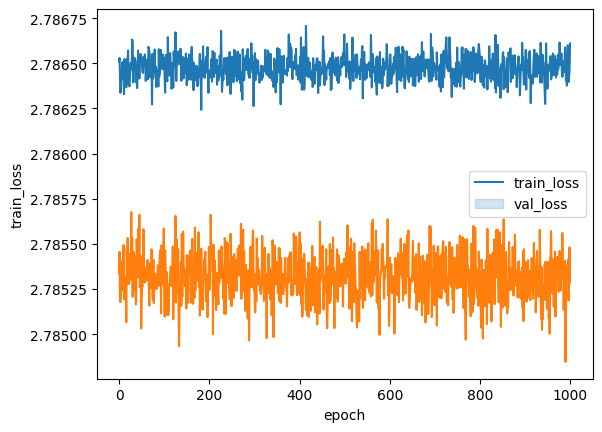

In [ ]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model(X_test).detach().numpy()
print(confusion_matrix(y_test,np.argmax(predictions, axis = 1)))

[[   0    0    0   24    0  142 5613    0    0    0    0    0    0  135
     0    0]
 [   0    0    0   38    0  151 6599    0    0    0    0    0    0  187
     0    0]
 [   0    0    0   20    0  102 4535    0    0    0    0    0    0  124
     0    0]
 [   0    0    0   23    0  150 5993    0    0    0    0    0    0  158
     0    0]
 [   0    0    0   41    0  193 8203    0    0    0    0    0    0  249
     0    0]
 [   0    0    0   23    0  136 5343    0    0    0    0    0    0  174
     0    0]
 [   0    0    0   25    0  114 4776    0    0    0    0    0    0  116
     0    0]
 [   0    0    0   26    0  184 6097    0    0    0    0    0    0  182
     0    0]
 [   0    0    0   15    0  100 3597    0    0    0    0    0    0  125
     0    0]
 [   0    0    0   15    0   96 3715    0    0    0    0    0    0  122
     0    0]
 [   0    0    0   18    0   96 3291    0    0    0    0    0    0  120
     0    0]
 [   0    0    0   21    0  101 4220    0    0    0    0    0    

In [ ]:
print(classification_report(y_test,np.argmax(predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5914
           1       0.00      0.00      0.00      6975
           2       0.00      0.00      0.00      4781
           3       0.06      0.00      0.01      6324
           4       0.00      0.00      0.00      8686
           5       0.07      0.02      0.04      5676
           6       0.06      0.95      0.11      5031
           7       0.00      0.00      0.00      6489
           8       0.00      0.00      0.00      3837
           9       0.00      0.00      0.00      3948
          10       0.00      0.00      0.00      3525
          11       0.00      0.00      0.00      4478
          12       0.00      0.00      0.00      5740
          13       0.04      0.03      0.03      3508
          14       0.00      0.00      0.00      4911
          15       0.00      0.00      0.00      3967

    accuracy                           0.06     83790
   macro avg       0.01   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
